In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ='/content/drive/MyDrive/Colab Notebooks/MLOps/TEEP/QQ/Data_Solar.csv'

# New Section

In [ ]:
df = pd.read_csv(file_path, sep=';', parse_dates=["Timestamp"])

In [ ]:
df.head(5)

,Timestamp,00886A - VNM - Nafoco - Inverter 1 - Current AC [A] - I_AC,00886A - VNM - Nafoco - Inverter 1 - Direct Current [A] - I_DC,00886A - VNM - Nafoco - Inverter 1 - AC Voltage [V] - U_AC,00886A - VNM - Nafoco - Inverter 1 - Voltage DC [V] - U_DC,00886A - VNM - Nafoco - Basics - Irradiance on module plane [W/m²] - G_M0,00886A - VNM - Nafoco - Basics - Module Temperature [°C] - T_MODULE
0,2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,15.600
1,2022-01-01 00:05:00,0.0,0.0,0.0,0.0,0.0,15.594
2,2022-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,15.559
3,2022-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,15.510
4,2022-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,15.540


In [ ]:
# Create a dictionary to map old column names to new names
new_names = {
    '00886A - VNM - Nafoco - Inverter 1 - Current AC [A] - I_AC': 'I_AC',
    '00886A - VNM - Nafoco - Inverter 1 - Direct Current [A] - I_DC': 'I_DC',
    '00886A - VNM - Nafoco - Inverter 1 - AC Voltage [V] - U_AC': 'U_AC',
    '00886A - VNM - Nafoco - Inverter 1 - Voltage DC [V] - U_DC': 'U_DC',
    '00886A - VNM - Nafoco - Basics - Irradiance on module plane [W/m²] - G_M0': 'Irrandiance',
    '00886A - VNM - Nafoco - Basics - Module Temperature [°C] - T_MODULE': 'T_MODULE'
}
#'I_AC', 'I_DC', 'U_AC', 'U_DC', 'P_AC', 'P_DC', 'Irrandiance', 'T_MODULE'
# Rename the columns using the dictionary
df = df.rename(columns=new_names)

In [ ]:
# Remove all data are not important
# df = dff.drop(dff[((dff.Timestamp.dt.hour < 8.0) & (dff['Irrandiance'] < 1)) | ((dff.Timestamp.dt.hour > 17.0) & (dff['Irrandiance'] < 1))].index)

In [ ]:
df.head(5)

,Timestamp,I_AC,I_DC,U_AC,U_DC,Irrandiance,T_MODULE
0,2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,15.600
1,2022-01-01 00:05:00,0.0,0.0,0.0,0.0,0.0,15.594
2,2022-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,15.559
3,2022-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,15.510
4,2022-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,15.540


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136800 entries, 0 to 136799
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Timestamp    136800 non-null  datetime64[ns]
 1   I_AC         134267 non-null  float64       
 2   I_DC         134267 non-null  float64       
 3   U_AC         134267 non-null  float64       
 4   U_DC         134267 non-null  float64       
 5   Irrandiance  134502 non-null  float64       
 6   T_MODULE     134502 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.3 MB


In [ ]:
df.describe()

,I_AC,I_DC,U_AC,U_DC,Irrandiance,T_MODULE
count,134267.000000,134267.000000,134267.000000,134267.000000,134502.000000,134502.000000
mean,48.759266,17.480588,126.976058,350.010040,139.279981,26.672673
std,78.360628,29.021420,118.957790,335.249776,230.109652,10.817150
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.386000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,19.250000
50%,6.362000,0.176000,235.662000,592.742000,1.569500,24.641000
75%,68.339000,23.584000,239.052000,680.431000,190.874750,29.986000
max,328.520000,129.148000,249.069000,827.848000,1266.917000,72.610000


In [ ]:
np.sum(df.isnull())

Timestamp         0
I_AC           2533
I_DC           2533
U_AC           2533
U_DC           2533
Irrandiance    2298
T_MODULE       2298
dtype: int64

In [ ]:
df = df.dropna()
np.sum(df.isnull())

Timestamp      0
I_AC           0
I_DC           0
U_AC           0
U_DC           0
Irrandiance    0
T_MODULE       0
dtype: int64

In [ ]:
print(df.isnull().values.any())

False


In [ ]:
df.shape

(134222, 7)

In [ ]:
np.sum(df['Irrandiance'].values == 0)

63169

In [ ]:
# ADD column df_new['hour]
df['Hour'] = df['Timestamp'].dt.time
df = df[['Hour'] + list(df.columns[:-1])]

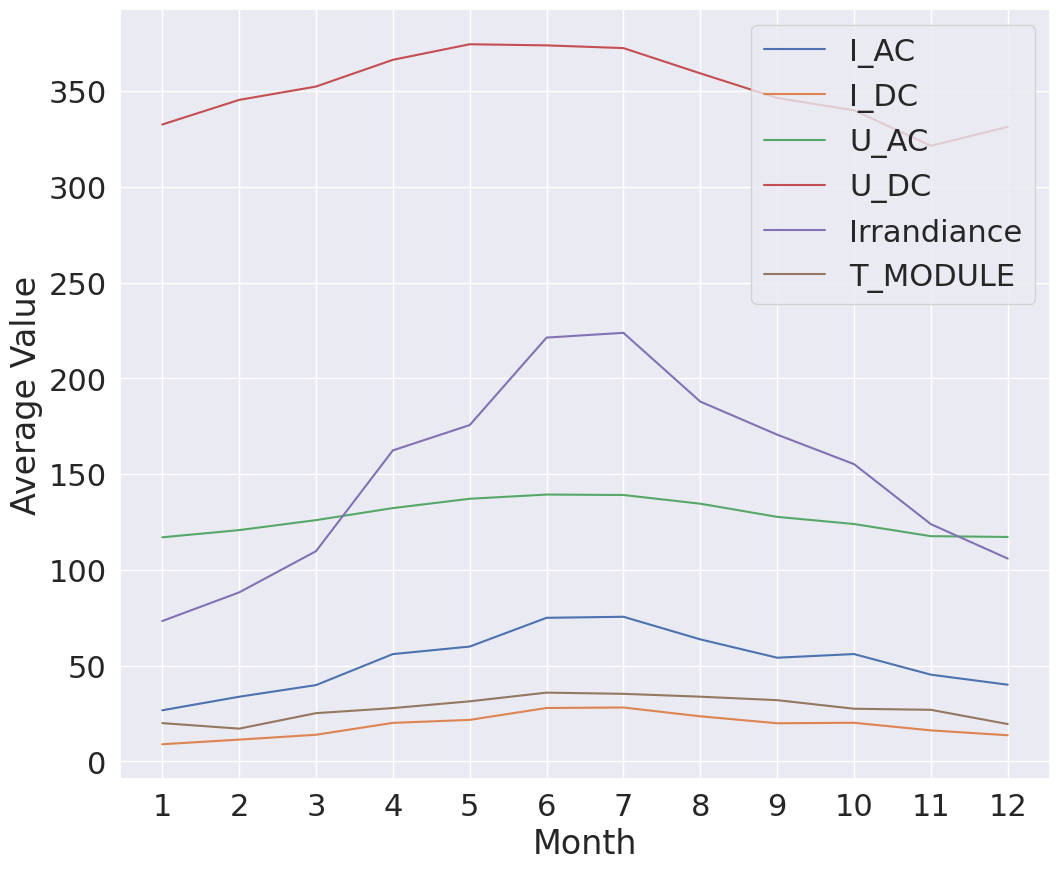

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for data in 2022
df_2022 = df[df['Timestamp'].dt.year == 2022]

# Exclude non-numeric columns from average calculation
numeric_columns = df_2022.select_dtypes(include=['float', 'int']).columns
df_numeric = df_2022[numeric_columns]

# Group the numeric data by month and calculate the average
monthly_avg = df_numeric.groupby(df_2022['Timestamp'].dt.month).mean()

# Plot the average values for each column
fig, ax = plt.subplots()
for column in monthly_avg.columns:
    if column != 'Timestamp':
        ax.plot(monthly_avg.index, monthly_avg[column], label=column)

# Set the x-axis label and ticks for months
plt.xlabel('Month')
plt.xticks(monthly_avg.index)

# Set the y-axis label
plt.ylabel('Average Value')

# Add a legend
plt.legend()

# Display the chart
plt.show()


<ipython-input-195-e6035b82cd4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sep_2_2022['Hour'] = df_sep_2_2022['Hour'].astype(str)


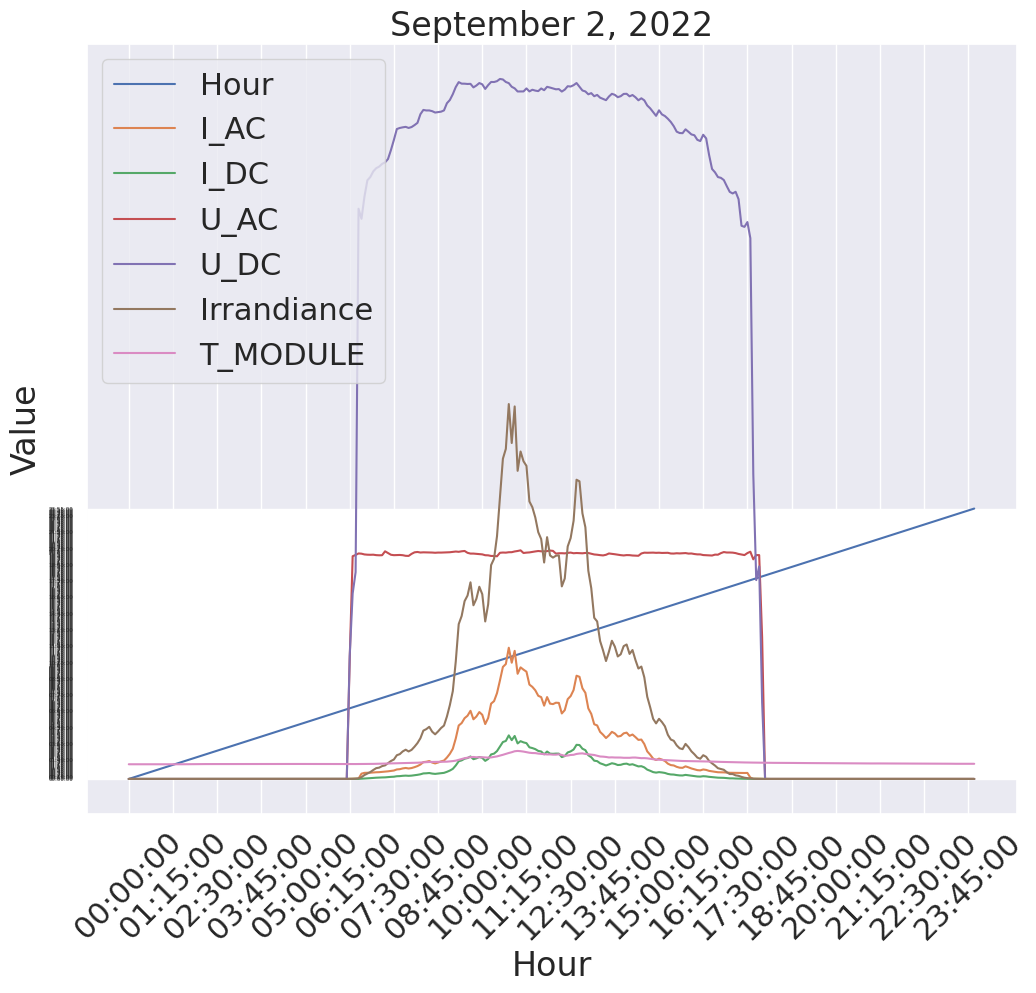

In [ ]:
# Filter the DataFrame for September 2, 2022 data
df_sep_2_2022 = df[df['Timestamp'].dt.date == pd.to_datetime('2022-01-01').date()]

# Convert Hour column to string
df_sep_2_2022['Hour'] = df_sep_2_2022['Hour'].astype(str)

# Subset the hour values
subset_hour_values = df_sep_2_2022['Hour'].unique()[::15]

# Plot the data for September 2, 2022
fig, ax = plt.subplots()
for column in df_sep_2_2022.columns:
    if column != 'Timestamp':
        ax.plot(df_sep_2_2022['Hour'], df_sep_2_2022[column], label=column)

# Set the title for the chart
plt.title('September 2, 2022')

# Set the x-axis label and ticks for Hour
plt.xlabel('Hour')
plt.xticks(subset_hour_values, rotation=45)

# Set the y-axis label and ticks for Value
plt.ylabel('Value')
plt.yticks(fontsize=4)
# Add a legend
plt.legend()

# Display the chart
plt.show()

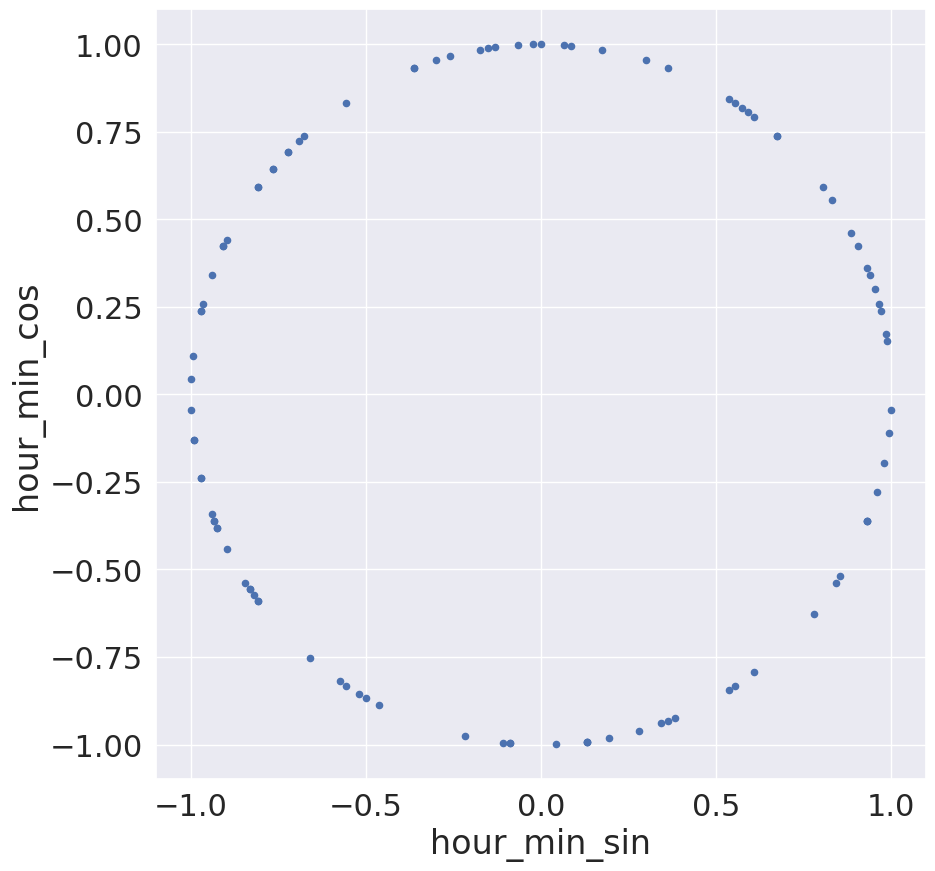

In [ ]:
df['hourfloat'] = df.Timestamp.dt.hour + df.Timestamp.dt.minute/60.0
df['hour_min_sin'] = np.sin(2.*np.pi*df.hourfloat/24.)
df['hour_min_cos'] = np.cos(2.*np.pi*df.hourfloat/24.)

df = df.drop(['hourfloat'], axis=1)
df.sample(100).plot.scatter('hour_min_sin', 'hour_min_cos').set_aspect('equal')

In [ ]:
# Add P_DC and P_AC
df['P_DC'] = df['I_DC']*df['U_DC']
df['P_AC'] = df['I_AC']*df['U_AC']

In [ ]:
df.describe()

,I_AC,I_DC,U_AC,U_DC,Irrandiance,T_MODULE,hour_min_sin,hour_min_cos,P_DC,P_AC
count,134222.000000,134222.000000,134222.000000,134222.000000,134222.000000,134222.000000,134222.000000,1.342220e+05,134222.000000,134222.000000
mean,48.764341,17.482572,126.938242,349.892943,139.205739,26.666877,-0.000555,1.681701e-03,11784.839412,11689.907436
std,78.371536,29.025441,118.959794,335.244895,229.973871,10.805732,0.707293,7.069232e-01,19202.833496,18830.959425
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.386000,-1.000000,-1.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,19.254000,-0.707107,-7.071068e-01,0.000000,0.000000
50%,6.360000,0.172000,235.656000,592.590000,1.576000,24.644000,0.000000,6.123234e-17,102.130866,1509.036924
75%,68.369500,23.595500,239.051000,680.403500,190.795250,29.981500,0.707107,7.071068e-01,16545.792440,16316.255726
max,328.520000,129.148000,249.069000,827.848000,1266.917000,72.610000,1.000000,1.000000e+00,79400.161160,78340.892192


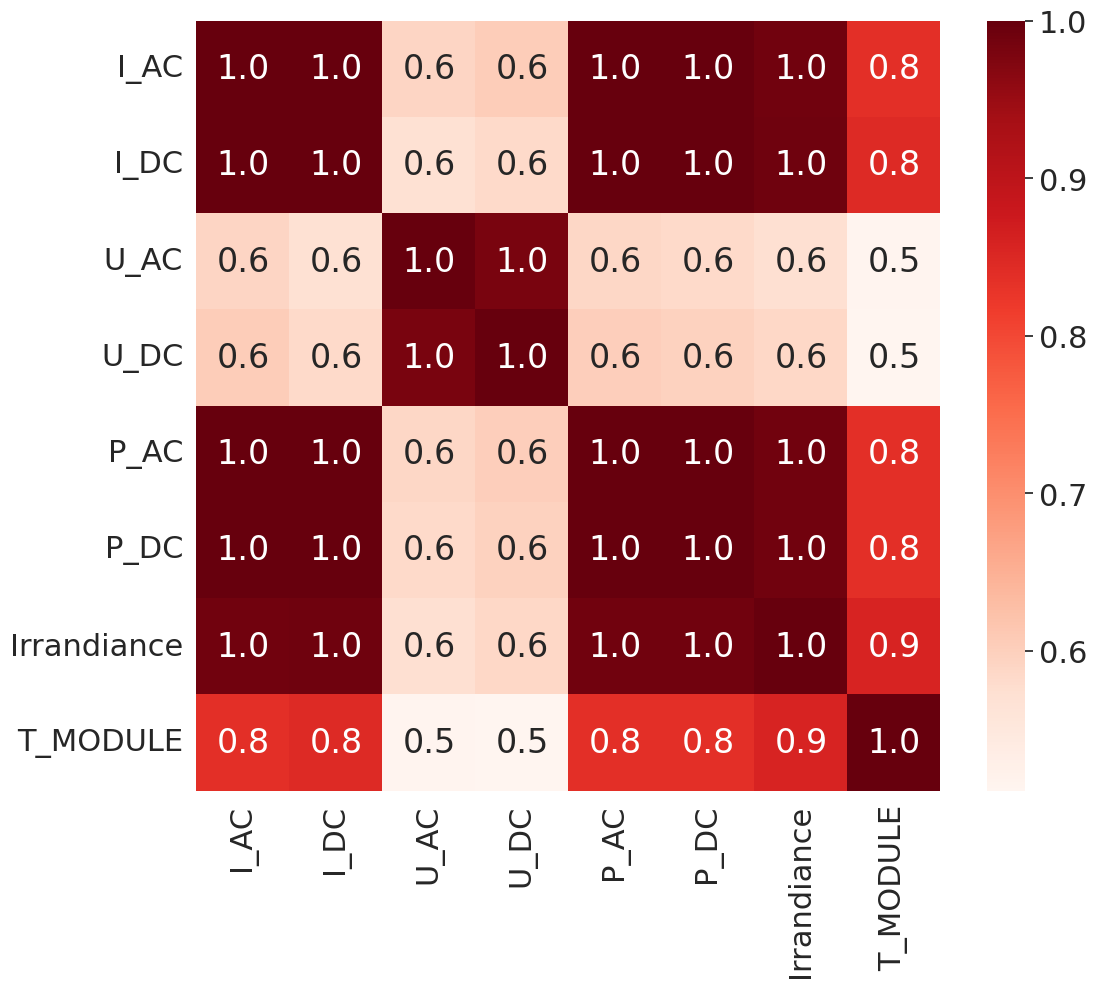

In [ ]:
sns.set(rc = {'figure.figsize': (12,10)}, font_scale=2)
sns.heatmap(df[['I_AC', 'I_DC', 'U_AC', 'U_DC', 'P_AC', 'P_DC', 'Irrandiance', 'T_MODULE']].corr(), cmap='Reds', annot=True,fmt=".1f")
plt.show()

In [ ]:
df['MonthYear'] = df['Timestamp'].dt.strftime('%Y-%m')
df = df[['MonthYear'] + list(df.columns[:-1])]
df.head()

,MonthYear,Hour,Timestamp,I_AC,I_DC,U_AC,U_DC,Irrandiance,T_MODULE,hour_min_sin,hour_min_cos,P_DC,P_AC
0,2022-01,00:00:00,2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,15.600,0.000000,1.000000,0.0,0.0
1,2022-01,00:05:00,2022-01-01 00:05:00,0.0,0.0,0.0,0.0,0.0,15.594,0.021815,0.999762,0.0,0.0
2,2022-01,00:10:00,2022-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,15.559,0.043619,0.999048,0.0,0.0
3,2022-01,00:15:00,2022-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,15.510,0.065403,0.997859,0.0,0.0
4,2022-01,00:20:00,2022-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,15.540,0.087156,0.996195,0.0,0.0


In [ ]:
# Drop element T_MODULE
df = df.drop(['T_MODULE'],axis=1)

In [ ]:
# Reset the index in a dataframe
df.reset_index(drop=True, inplace=True)

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-95-0890aefbf3d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-95-0890aefbf3d8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,I_AC,I_DC,U_AC,U_DC,Irrandiance,hour_min_sin,hour_min_cos,P_DC,P_AC
I_AC,1.00,1.00,0.59,0.60,0.99,0.01,-0.71,1.00,1.00
I_DC,1.00,1.00,0.57,0.58,0.99,0.01,-0.69,1.00,1.00
U_AC,0.59,0.57,1.00,0.98,0.57,-0.02,-0.90,0.58,0.59
U_DC,0.60,0.58,0.98,1.00,0.59,-0.01,-0.91,0.60,0.60
Irrandiance,0.99,0.99,0.57,0.59,1.00,-0.01,-0.69,0.99,0.99
hour_min_sin,0.01,0.01,-0.02,-0.01,-0.01,1.00,0.00,0.01,0.01
hour_min_cos,-0.71,-0.69,-0.90,-0.91,-0.69,0.00,1.00,-0.70,-0.71
P_DC,1.00,1.00,0.58,0.60,0.99,0.01,-0.70,1.00,1.00
P_AC,1.00,1.00,0.59,0.60,0.99,0.01,-0.71,1.00,1.00


In [ ]:
# Split train and test
df_train_set, df_test_set = train_test_split(df, test_size=0.1, random_state=2023)


df2_train_set = df_train_set.drop(['Timestamp'], axis=1)
df2_test_set = df_test_set.drop(['Timestamp'], axis=1)

In [ ]:
df_train_set_sorted = df_train_set.sort_values('MonthYear')
df_test_set_sorted = df_train_set.sort_values('MonthYear')

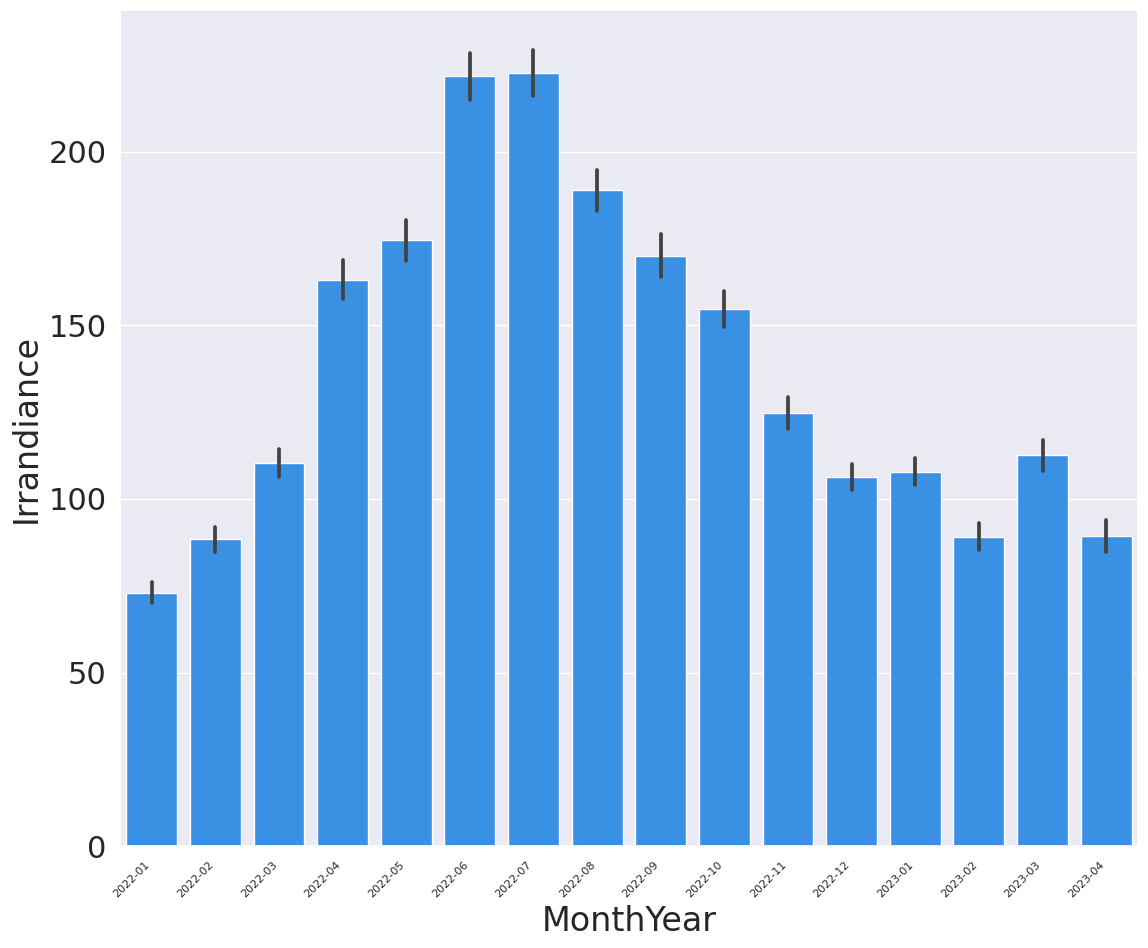

In [ ]:
sns.barplot(data=df_train_set_sorted, x='MonthYear', y='Irrandiance', color='dodgerblue')
# Adjust x-axis labels
plt.xticks(fontsize=8, ha='right', rotation=45)

# Display the plot
plt.tight_layout()  # Adjust the layout if needed
plt.show()

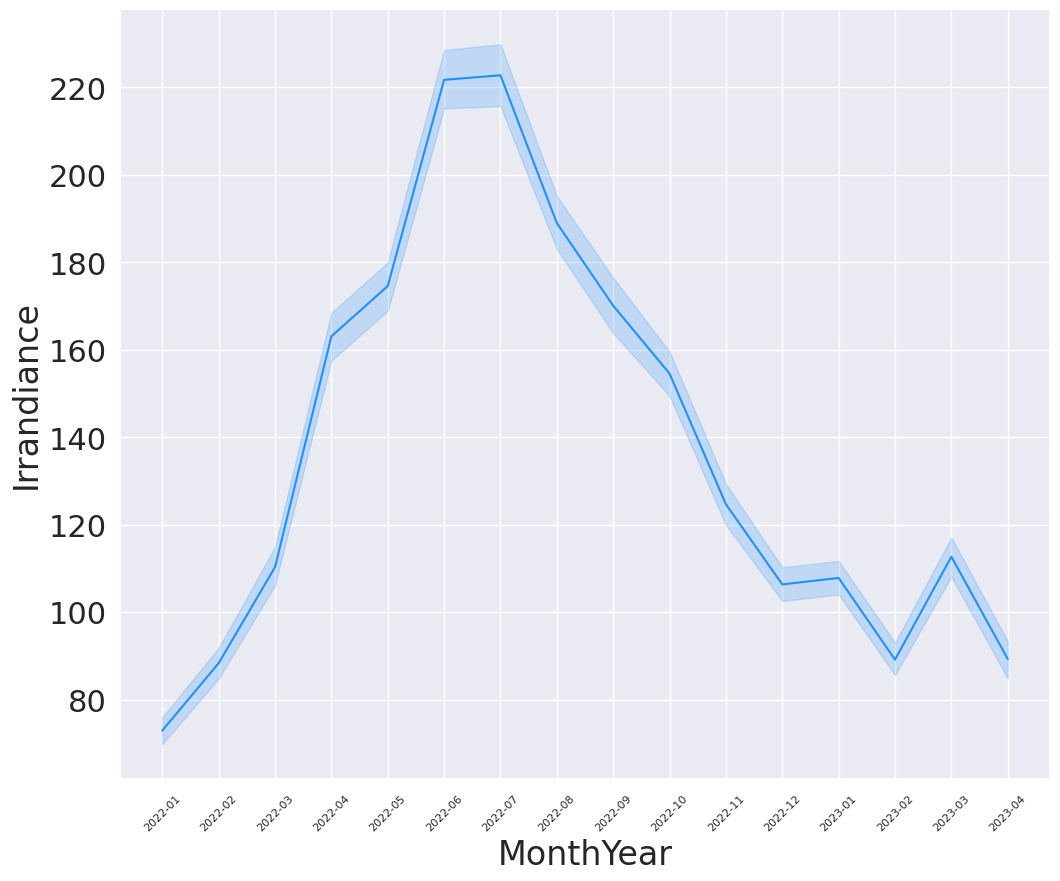

In [ ]:
sns.lineplot(data=df_train_set_sorted, x='MonthYear', y='Irrandiance', color='dodgerblue')
# Adjust x-axis labels
plt.xticks(fontsize=8, rotation=45)
# Display the plot
plt.show()

In [ ]:
# # Standardize data based on mean & sd of whole data
# df2 = df.drop('Timestamp', axis=1)
# mean = df2.mean(axis=0)
# std = df2.std(axis=0)
# df2_train_std = (df2_train_set - mean)/std
# df2_test_std = (df2_test_set - std)/std

In [ ]:
df_train_set.head()

,MonthYear,Hour,Timestamp,I_AC,I_DC,U_AC,U_DC,Irrandiance,hour_min_sin,hour_min_cos,P_DC,P_AC
6215,2022-01,13:55:00,2022-01-22 13:55:00,107.258,36.322,236.873,711.762,277.300,-0.480989,-0.876727,25852.619364,25406.524234
122699,2023-03,03:40:00,2023-03-05 03:40:00,0.000,0.000,0.000,0.000,0.000,0.819152,0.573576,0.000000,0.000000
16122,2022-02,23:30:00,2022-02-25 23:30:00,0.000,0.000,0.000,0.000,0.000,-0.130526,0.991445,0.000000,0.000000
2512,2022-01,17:20:00,2022-01-09 17:20:00,6.308,0.322,236.379,582.236,2.571,-0.984808,-0.173648,187.479992,1491.078732
81190,2022-10,00:00:00,2022-10-11 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000000,1.000000,0.000000,0.000000


In [ ]:
df_train_set.describe()

,I_AC,I_DC,U_AC,U_DC,Irrandiance,hour_min_sin,hour_min_cos,P_DC,P_AC
count,120799.000000,120799.000000,120799.000000,120799.000000,120799.000000,1.207990e+05,1.207990e+05,120799.000000,120799.000000
mean,48.758961,17.479780,126.992209,350.035766,139.203601,5.883510e-04,1.510058e-03,11783.431148,11688.566664
std,78.358179,29.019599,118.948993,335.258606,229.926982,7.071877e-01,7.070298e-01,19199.494649,18827.670892
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-7.071068e-01,-7.071068e-01,0.000000,0.000000
50%,6.360000,0.178000,235.658000,592.750000,1.614000,1.224647e-16,6.123234e-17,105.327552,1509.483524
75%,68.389000,23.604000,239.050000,680.430000,190.986500,7.071068e-01,7.071068e-01,16556.119440,16334.616904
max,328.520000,129.148000,249.069000,827.848000,1266.917000,1.000000e+00,1.000000e+00,79400.161160,78340.892192


In [ ]:
# Standardize data based on mean & sd of whole data
# Transform data train
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
df2_train = df_train_set.drop(['Timestamp', 'MonthYear', 'Hour'], axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2_train)
df2_train_std = pd.DataFrame(scaled_data, columns=df2_train.columns)

In [ ]:
# Transform data test
df2_test = df_test_set.drop(['Timestamp', 'MonthYear', 'Hour'], axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2_test)
df2_test_std = pd.DataFrame(scaled_data, columns=df2_test.columns)

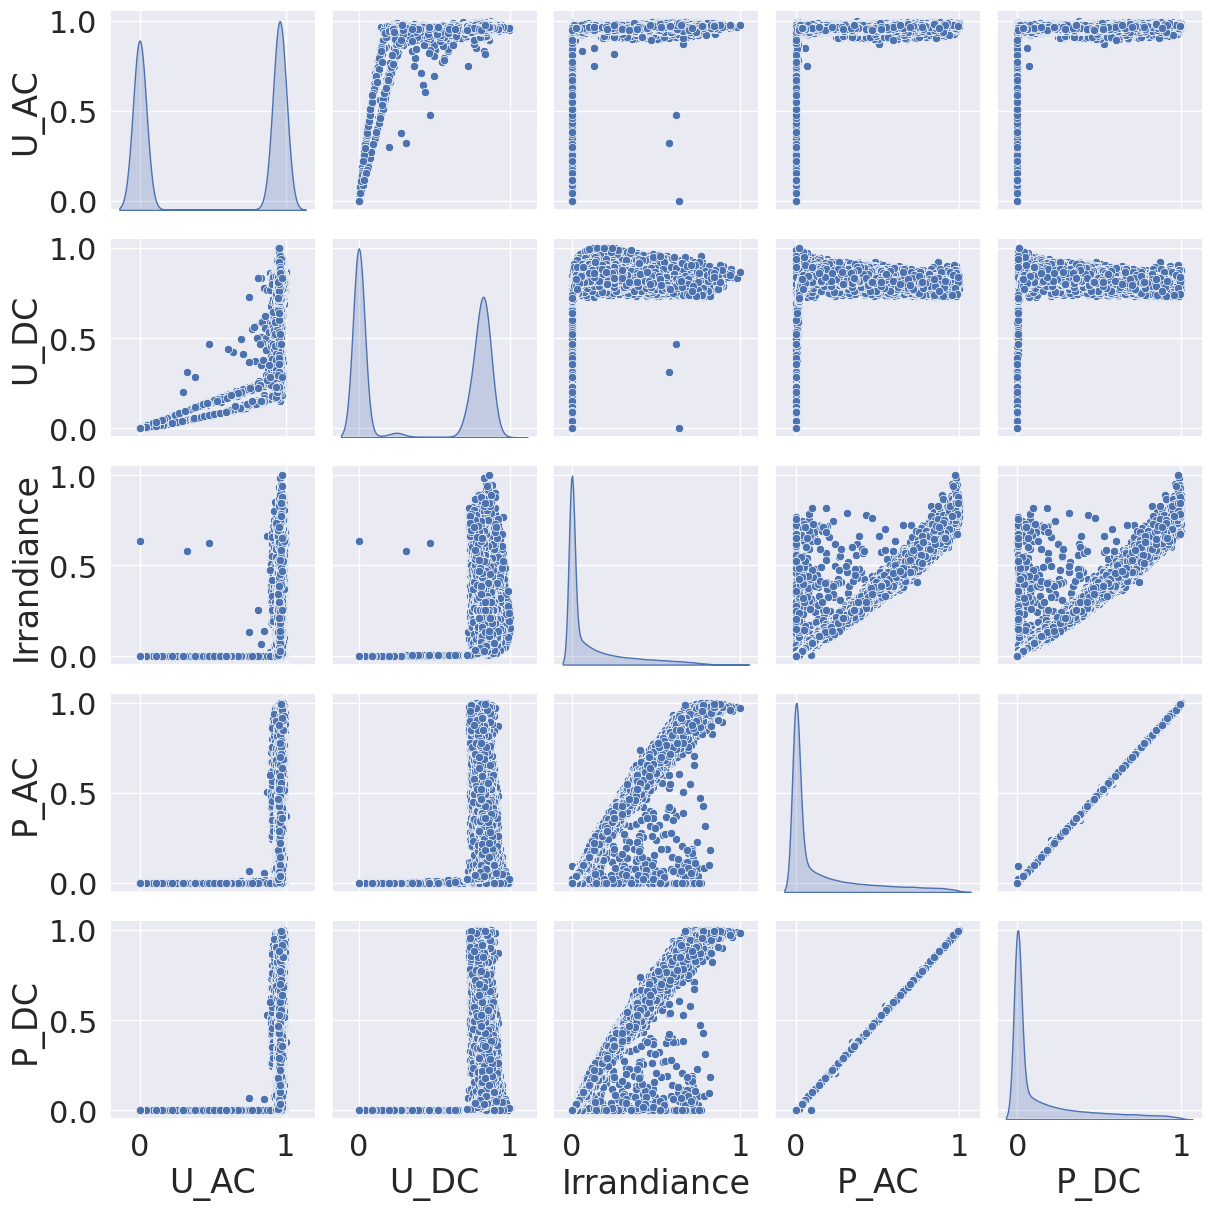

In [ ]:
# Table pairplot
sns.pairplot(df2_train_std[['U_AC', 'U_DC', 'Irrandiance', 'P_AC', 'P_DC']], diag_kind='kde')

**Hệ số tương quan**

là một chỉ số đo lường của một số loại tương quan, nghĩa là mối liên hệ thống kê giữa hai biến số.

$$r =\frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
$$


Nhận xét:
- Khi mối tương quan này nhỏ hơn 0, đồng nghĩa mối quan hệ nghịch biến, khi biến này tăng thì biến kia giảm và ngược lại
- Khi mối tương quan này lớn hơn 0, đồng nghĩa mối quan hệ đồng biến, khi biến này tăng thì biến kia tăng và khi biến này giảm thì biến kia giảm
- Khi mối tương quan này bằng 0, 2 biến không có quan hệ với nhau.

Hiển thị ma trận tương quan. Ma trận này hiển thị tất cả các giá trị tương quan giữa các cột dữ liệu với nhau. Trong thực tế, việc hiển thị này thường để xác định các cặp đặc trưng tương quan mạnh với nhau từ đó đưa ra quyết định `không sử dụng` một trong 2 đặc trưng để xây dựng mô hình.

In [ ]:
df2_train_std.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-108-bd1cab89d7e8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df2_train_std.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,I_AC,I_DC,U_AC,U_DC,Irrandiance,hour_min_sin,hour_min_cos,P_DC,P_AC
I_AC,1.00,1.00,0.59,0.60,0.99,0.01,-0.71,1.00,1.00
I_DC,1.00,1.00,0.57,0.58,0.99,0.01,-0.69,1.00,1.00
U_AC,0.59,0.57,1.00,0.98,0.57,-0.02,-0.90,0.58,0.59
U_DC,0.60,0.58,0.98,1.00,0.59,-0.01,-0.91,0.60,0.60
Irrandiance,0.99,0.99,0.57,0.59,1.00,-0.01,-0.69,0.99,0.99
hour_min_sin,0.01,0.01,-0.02,-0.01,-0.01,1.00,0.00,0.01,0.01
hour_min_cos,-0.71,-0.69,-0.90,-0.91,-0.69,0.00,1.00,-0.70,-0.71
P_DC,1.00,1.00,0.58,0.60,0.99,0.01,-0.70,1.00,1.00
P_AC,1.00,1.00,0.59,0.60,0.99,0.01,-0.71,1.00,1.00


In [ ]:
df_train_set.shape

(120799, 12)

In [ ]:
df_test_set.shape

(13423, 12)

In [ ]:
df2_train_std

,I_AC,I_DC,U_AC,U_DC,Irrandiance,hour_min_sin,hour_min_cos,P_DC,P_AC
0,0.326488,0.281243,0.951034,0.859774,0.218878,0.259506,0.061637,0.325599,0.324307
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.909576,0.786788,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.434737,0.995722,0.000000,0.000000
3,0.019201,0.002493,0.949050,0.703313,0.002029,0.007596,0.413176,0.002361,0.019033
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
120794,0.000000,0.000000,0.000000,0.000000,0.000000,0.131361,0.837795,0.000000,0.000000
120795,0.218605,0.190433,0.964291,0.860849,0.135707,0.992404,0.413176,0.220742,0.220171
120796,0.000000,0.000000,0.000000,0.000000,0.000000,0.999881,0.489093,0.000000,0.000000
120797,0.470212,0.428052,0.948263,0.812768,0.339765,0.328990,0.030154,0.468467,0.465710


**One-Class SVM:**

It creates a boundary around the normal instances in a dataset, considering them as the only class during training. Instances that fall outside the boundary are considered outliers.

In [ ]:
one_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.4)
one_svm.fit(df2_train_std)

OneClassSVM(gamma=0.4, nu=0.05)

In [ ]:
pre_test_outliers = one_svm.predict(df2_test_std)

In [ ]:
import numpy as np

# Count the number of outliers
num_outliers = np.count_nonzero(pre_test_outliers == -1)

print("Number of outliers:", num_outliers)

Number of outliers: 1014


Percentage of outliers detected: 7.55%


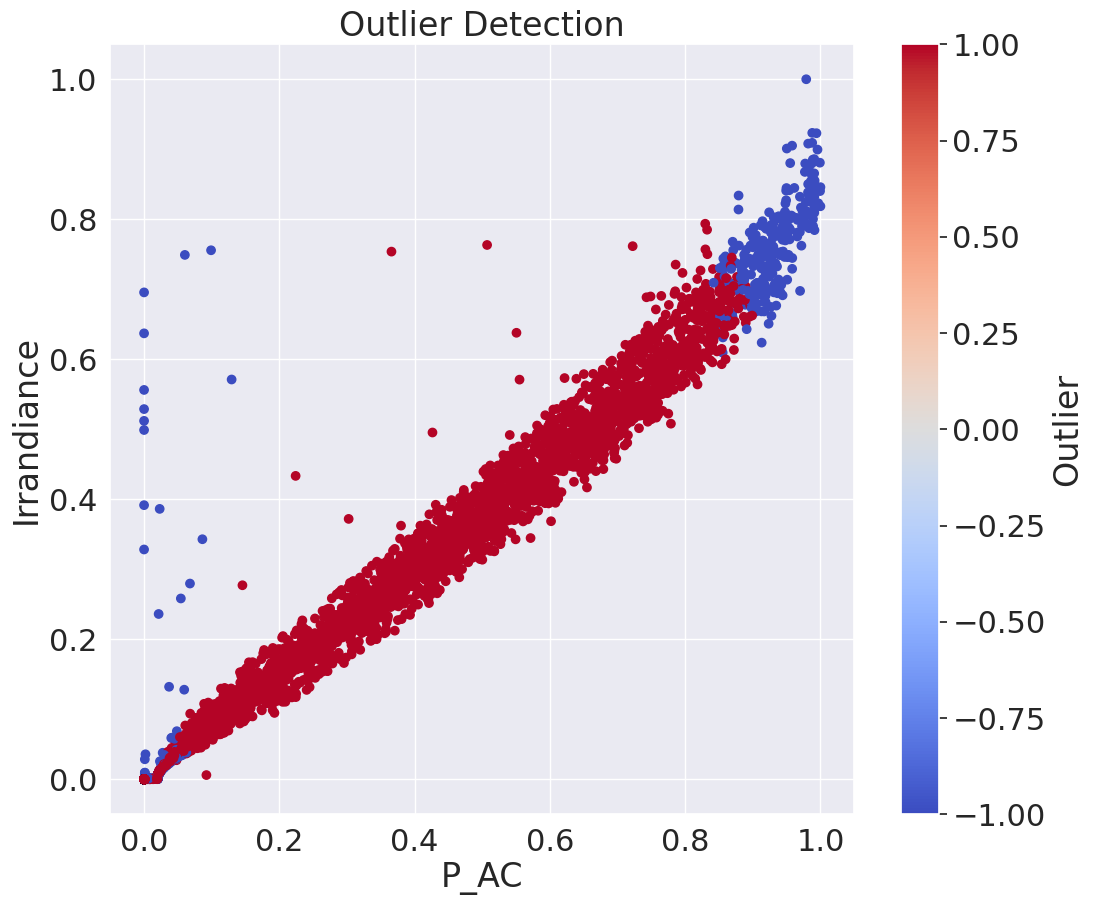

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of outliers detected
percentage_outliers = (pre_test_outliers <-0.5).sum() / len(pre_test_outliers) * 100

# Print the percentage of outliers detected
print(f"Percentage of outliers detected: {percentage_outliers:.2f}%")

# Plot the outliers
plt.scatter(df2_test_std['P_AC'], df2_test_std['Irrandiance'], c=pre_test_outliers, cmap='coolwarm')
plt.xlabel('P_AC')
plt.ylabel('Irrandiance')
plt.title('Outlier Detection')
plt.colorbar(label='Outlier')
plt.show()

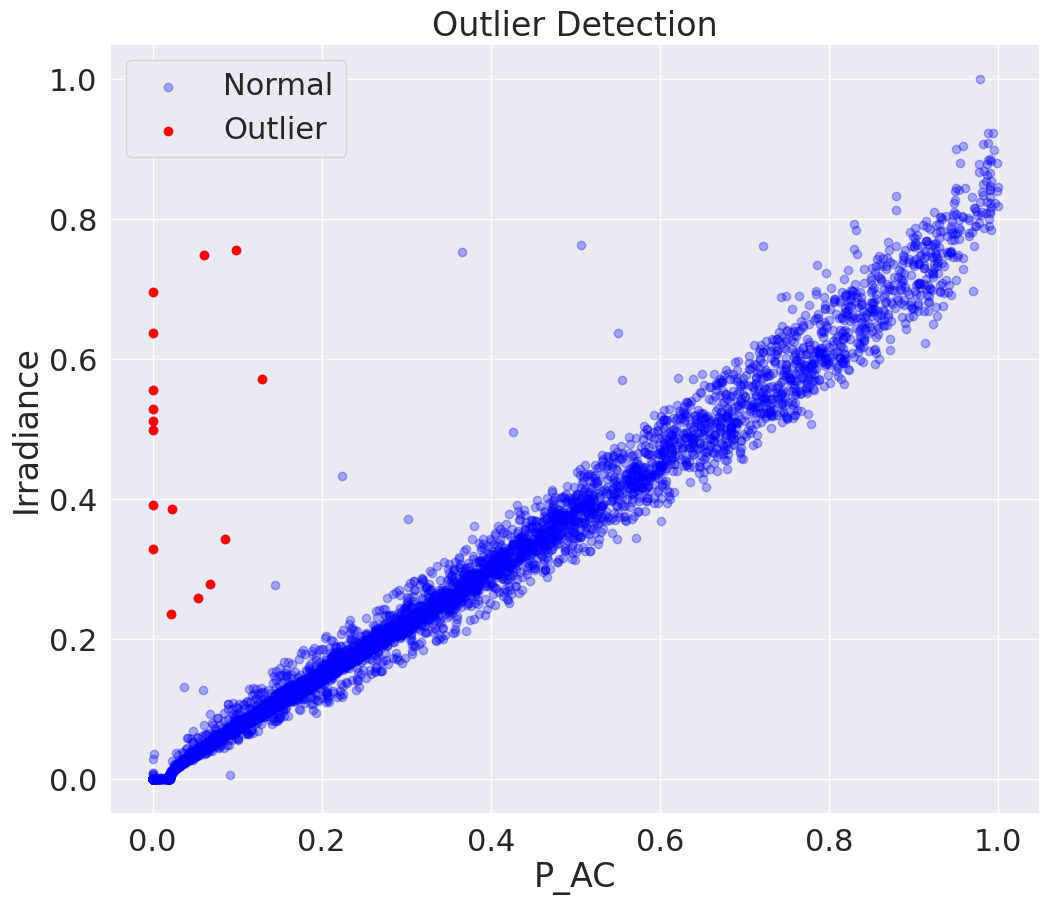

In [ ]:
outliers_indices = (pre_test_outliers < -0.5)
outliers = df2_test_std[outliers_indices & (df2_test_std['Irrandiance'] > 0.2) & (df2_test_std['P_AC'] < 0.7)]

# Plot the outliers
plt.scatter(df2_test_std['P_AC'], df2_test_std['Irrandiance'], c='blue', alpha=0.3, label='Normal')
plt.scatter(outliers['P_AC'], outliers['Irrandiance'], c='red', label='Outlier')
plt.xlabel('P_AC')
plt.ylabel('Irradiance')
plt.title('Outlier Detection')
plt.legend()
plt.show()

In [ ]:
# df_test_set['predict'] = pre_test_outliers
# df_test_outliers = df_test_set[(df_test_set['predict']==-1)]
# df_test_outliers = df_test_outliers.drop(['hour_min_sin'], axis=1)
# df_test_outliers = df_test_outliers.drop(['hour_min_cos'], axis=1)
# df_test_outliers = df_test_outliers.drop(['predict'], axis=1)

# df_test_outlierss = df_test_outliers[(df_test_outliers['I_AC'] > 0) & (df_test_outliers['Irrandiance'] > 0)]
# df_test_outlierss = df_test_outliers.sort_values(['Timestamp'], ascending=True)

In [ ]:
# df_test_outliers.shape

In [ ]:
# df_test_outlierss.head()

In [ ]:
# df_test_outliers.to_csv('/content/df_test_outliers.csv')

In [ ]:
# total_test_data = np.hstack((df2_test_std, pre_test_outliers.reshape(-1, 1)))

In [ ]:
# normal_test_data = total_test_data[total_test_data[:, -1] == 1]
# outlier_test_data = total_test_data[total_test_data[:, -1] == -1]

In [ ]:
# len(outlier_test_data)
# len(total_test_data)
# len(outlier_test_data)/len(total_test_data)*100

In [ ]:
# df_2022 = df[df['Timestamp'].dt.year == 2022]

# df_2022
# # Exclude non-numeric columns from average calculation
# numeric_columns = df_2022.select_dtypes(include=['float', 'int']).columns
# df_numeric = df_2022[numeric_columns]

# # Group the numeric data by month and calculate the average
# monthly_avg = df_numeric.groupby(df_2022['Timestamp'].dt.month).mean()

# monthly_avg.head()